<a href="https://colab.research.google.com/github/JoDeMiro/LuaLisa/blob/main/Lua_Lisa_01_Intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import numpy as np

import sklearn
from sklearn.neural_network import MLPRegressor

import matplotlib.pyplot as plt


In [7]:
id = np.arange(0, 1, 0.1)
id = np.linspace(0, 1, 100)
beta = 3
y1 = np.sin(id) * beta
y2 = np.sin(id * beta)

print(id.shape)
print(y1.shape)

(100,)
(100,)


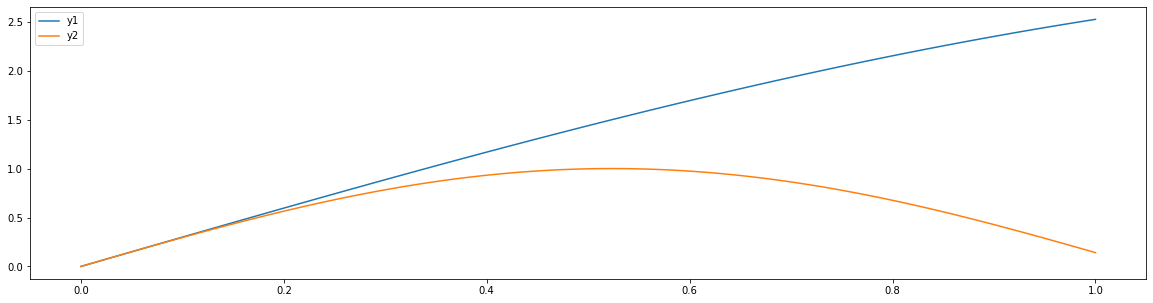

In [9]:
plt.figure(figsize=(20, 5))
plt.plot(id, y1, label='y1')
plt.plot(id, y2, label='y2')
plt.legend()
plt.show()

(100, 1)
(100,)


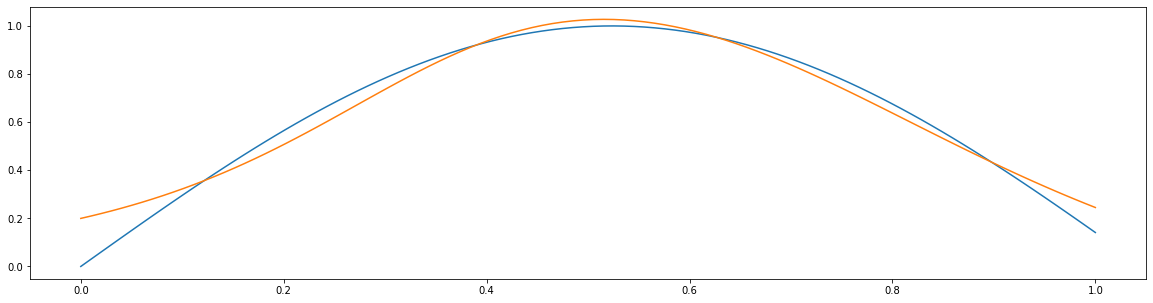

In [27]:
mlp = MLPRegressor(hidden_layer_sizes=(3,2),
                   activation='tanh',
                   solver='adam',
                   batch_size=100,
                   learning_rate_init=0.1,
                   max_iter=200,
                   shuffle=True,
                   random_state=1)

def sin(id = None, beta = None):
  sinus = id * beta
  return beta

input = id.reshape(-1,1)
target = y2
print(input.shape)
print(target.shape)

mlp.fit(input, target)

pred = mlp.predict(input)

plt.figure(figsize=(20, 5))
plt.plot(id, y2, label='y2')
plt.plot(id, pred, label='pred')
plt.show()

## Evoluciós módszerrel keressük a megfelelő paramtéert

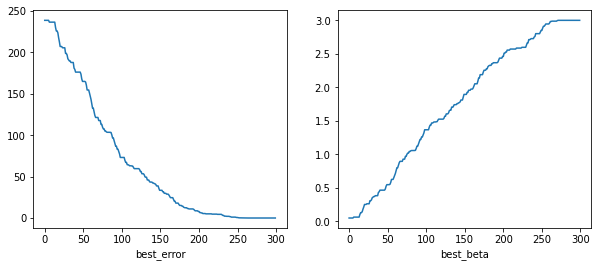

In [51]:
def lathatatlan_fuggveny(id, beta):
  return np.sin(id) * beta

id = np.linspace(0, 1, 100)

beta_amit_keresünk = 3
y1 = lathatatlan_fuggveny(id, beta_amit_keresünk)

decay = 0.1

best_beta_holder  = []
best_error_holder = []
best_beta  = 0
best_error = 99999999
for i in range(300):
  current_beta = best_beta + ((-0.5 + np.random.random()) * decay)
  pred  = lathatatlan_fuggveny(id, current_beta)
  error = np.sum((pred-y1)**2)
  error = float(error)
  if error < best_error:
    best_beta = current_beta
    best_error = error
  best_error_holder.append(best_error)
  best_beta_holder.append(best_beta)
  # print('best_error = {:.3}, best_beta = {:.2} '.format(best_error, best_beta))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
ax1.plot(best_error_holder)
ax1.set_xlabel('best_error')
ax2.plot(best_beta_holder)
ax2.set_xlabel('best_beta')
plt.show()

In [28]:
np.random.random()

0.2311758331593935